In [1]:
# Importing all necessary packages
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt 

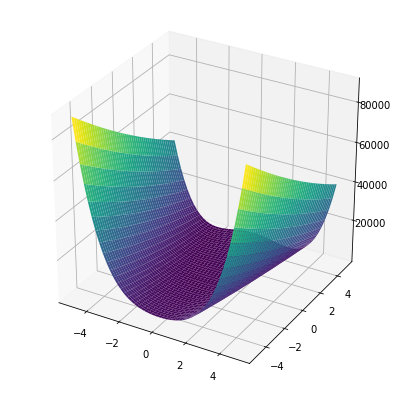

In [2]:
# Question 1b
from mpl_toolkits import mplot3d

def func(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

# create two one-dimensional grids using linspace
x = np.linspace(-5, 5, 50) 
y = np.linspace(-5, 5, 50) 

# combine the two one-dimensional grids into one two-dimensional grid
X, Y = np.meshgrid(x, y) 

# evaluate the function at each element of the two dimensional grid
Z = func(X, Y) 

# create plot 
fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
plt.show()

In [3]:
# Question 1c 

import numpy as np 

def gradient(x, y): 
    derivative = np.array([[-400*x*(y-x**2)-2+2*x], [200*(y-x**2)]])
    return derivative

def hessian(x, y): 
    double_derivative = np.array([[-400*(y-3*x**2)+2, -400*x], [-400*x, 200]])
    return double_derivative

x = np.array([[-1.2, 1]])
x = x.T

result = 1 
while np.linalg.norm(gradient(x[0][0], x[1][0]), ord = 2) >= 0.000001:
    x = x - np.matmul(np.linalg.inv(hessian(x[0][0], x[1][0])),
                     gradient(x[0][0], x[1][0]))
    print(f"{x}")
    result

[[-1.1752809 ]
 [ 1.38067416]]
[[ 0.76311487]
 [-3.17503385]]
[[0.76342968]
 [0.58282478]]
[[0.99999531]
 [0.94402732]]
[[0.9999957 ]
 [0.99999139]]
[[1.]
 [1.]]


In [4]:
# Question 2d
songs_data = pd.read_csv('songs.csv')

# Part (I): Removing the features
remove_features = ['Artist Name', 'Track Name', 'key', 'mode', 'time_signature', 'instrumentalness']
songs_data = songs_data.drop(remove_features, axis = 1) 

# Part (II): Recoding target variable as y = 1 (hiphop) and y = 0 (pop) 
songs_data = songs_data[(songs_data['Class'] == 5) | (songs_data['Class'] == 9)]
songs_data['Class'].replace([5, 9], [1, -1], inplace = True) 
songs_data = songs_data.reset_index(drop = True) 

# Part (III): Removing rows that have missing values 
songs_data = songs_data.dropna()
songs_data.isnull().sum()

# Part (IV): Splitting data to X_train, X_test, Y_train and Y_test
X_train, X_test, Y_train, Y_test = train_test_split(songs_data.iloc[:,0:-1], songs_data.iloc[:,-1], test_size=0.3, random_state=23)

# Part (V): Scaling the data 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

# Part (VI): Printing out first and last rows of X_train, X_test, Y_train, Y_test
X_train = pd.DataFrame(X_train, columns = ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
'liveness', 'valence', 'tempo', 'duration_in min/ms'])

X_test = pd.DataFrame(X_test, columns = ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
'liveness', 'valence', 'tempo', 'duration_in min/ms'])

Y_train = pd.DataFrame(Y_train, columns = ['Class'])

Y_test = pd.DataFrame(Y_test, columns = ['Class'])

In [5]:
X_train_first_row = X_train.iloc[0, 0:3]
print(X_train_first_row) 

Popularity     -0.935558
danceability    0.675193
energy          1.384998
Name: 0, dtype: float64


In [6]:
X_train_last_row = X_train.iloc[-1, 0:3]
print(X_train_last_row) 

Popularity     -1.133015
danceability   -1.094589
energy          0.967024
Name: 2719, dtype: float64


In [7]:
X_test_first_row = X_test.iloc[0, 0:3]
print(X_test_first_row) 

Popularity     -0.293825
danceability    1.360051
energy          0.263068
Name: 0, dtype: float64


In [8]:
X_test_last_row = X_test.iloc[-1, 0:3]
print(X_test_last_row) 

Popularity     -0.293825
danceability   -1.053904
energy         -1.348332
Name: 1165, dtype: float64


In [9]:
Y_train_first_row = Y_train.iloc[0]
print(Y_train_first_row) 

Class   -1
Name: 3293, dtype: int64


In [10]:
Y_train_last_row = Y_train.iloc[-1]
print(Y_train_last_row) 

Class    1
Name: 612, dtype: int64


In [11]:
Y_test_first_row = Y_test.iloc[0]
print(Y_test_first_row) 

Class   -1
Name: 3476, dtype: int64


In [12]:
Y_test_last_row = Y_test.iloc[-1]
print(Y_test_last_row) 

Class    1
Name: 25, dtype: int64


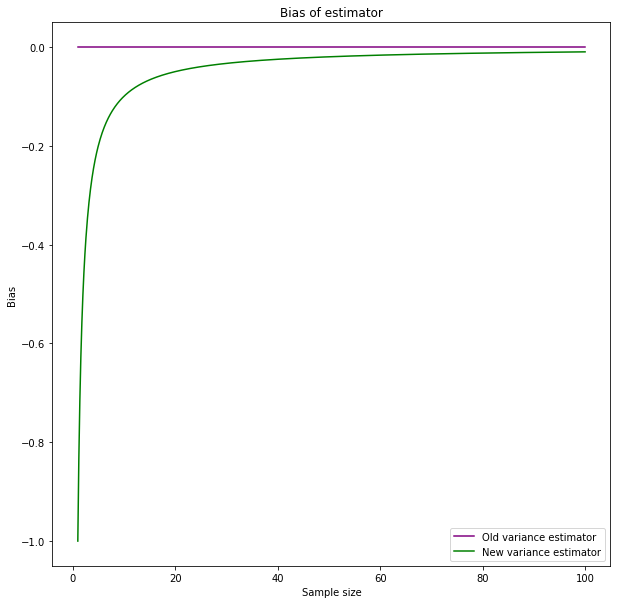

In [17]:
# Question 3b

import matplotlib.pyplot as plt

xrange = np.linspace(1, 100, 1000)
sigma = 1 

bias_tilda = lambda x: x * 0
bias_mle = lambda x: -sigma **2 / x

bias_tilda_value = bias_tilda(xrange)
bias_mle_value = bias_mle(xrange)

plt.figure(figsize = (10, 10))
plt.plot(xrange, bias_tilda_value, label = 'Old variance estimator', color = 'purple')
plt.plot(xrange, bias_mle_value, label = 'New variance estimator', color = 'green')

plt.legend()
plt.xlabel('Sample size')
plt.ylabel('Bias')
plt.title('Bias of estimator')
plt.show()

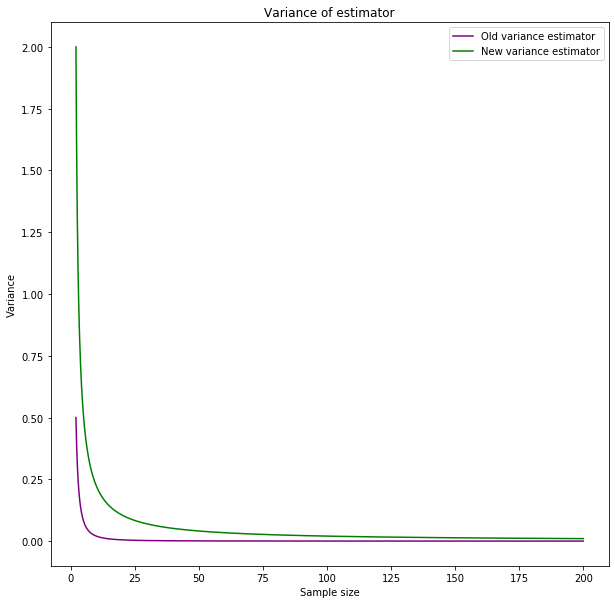

In [18]:
xrange = np.linspace(2, 200, 2000)

var_tilda = lambda x: 2 * sigma**4 / x**2 
var_mle = lambda x: 2 * sigma**4 / (x - 1) 

var_tilda_values = var_tilda(xrange) 
var_mle_values = var_mle(xrange) 

plt.figure(figsize = (10, 10)) 
plt.plot(xrange, var_tilda_values, label = 'Old variance estimator', color = 'purple')
plt.plot(xrange, var_mle_values, label = 'New variance estimator', color = 'green') 

plt.legend()
plt.xlabel('Sample size')
plt.ylabel('Variance') 
plt.title('Variance of estimator')
plt.show()